# Lecture13: Generative Models  
## 1. 비지도 학습(unsupervised learning)  
지금까지는 다양한 **지도학습(supervised learning)** 문제를 다뤄왔다. 지도학습에는 데이터 X, 레이블 Y가 있었다. 지도 학습의 목적은 데이터 X를 레이블 Y에 매핑시키는 함수를 배우는 것이다. 지도 학습의 예로 classification, object detection, semantic segmentation, image captioning 등이 있었다.  

반면에 **비지도학습(unsupervised learning)** 은 레이블 없이 학습 데이터만 가지고 데이터에 숨어있는 기본적인 구조를 학습시키는 것이다. 비지도학습의 예는 다음과 같다.  
* 1. 군집화(clustering)  
  
군집화의 목표는 일정 metric을 가지고 유사한 데이터들끼리 묶어(group)주는 것이다.  
* 2. 차원 축소(dimensionality reduction)  
  
차원 축소 문제에서는 학습 데이터가 가장 많이 퍼져있는 축을 찾아내는 것이다. 축을 곧 데이터에 숨어있는 구조의 일부분이라고 볼 수 있다. 이 방법은 데이터의 차원을 감소시키는데 사용할 수 있다. 

위의 그림에 3차원 데이터가 있다. 이 데이터에서 두 개의 축을 찾아내 2차원으로 차원을 축소시킬 수 있다.(projection) 

* 3. Autoencoder로 데이터의 feature representation을 학습  
  
AE의 Loss는 입력 데이터를 얼마나 잘 재구성했는지를 나타내는데, 이를 이용해서 특징들을 학습시킬 수 있다. AE를 사용하면 레이블 없이도 feature representation을 학습시킬 수 있다.  
* 4. 분포 추정(density estimation)  
  
이는 데이터가 가진 기본적인(underlyting) 분포를 추정하는 방법이다.  
  
✔️지도/비지도 학습의 차이점을 요약하면, 지도학습의 경우에는
레이블을 통해 X에서 Y로 가능 함수 매핑을 학습한다. 비지도 학습의 경우에는 레이블이 없고 대신에 데이터의 숨겨진 구조를 학습한다. 군집화(grouping), 변화의 중심 축(axis of variation), 혹은 데이터의 밀도추정 등이 있다. 비지도 학습이 인기 있는 이유는 레이블이 필요 없어서 데이터를 아주 많이 모을 수 있다는 점과, 데이터에 대한 비용도 아주 적게 든다는 점 때문이다.  
## 2. Generative models(생성 모델)  
### 1) 생성모델의 개념
생성 모델은 비지도 학습의 일종으로, 생성 모델의 목적은
동일한 분포에서 새로운 샘플들을 생성해 내는 것이다. 

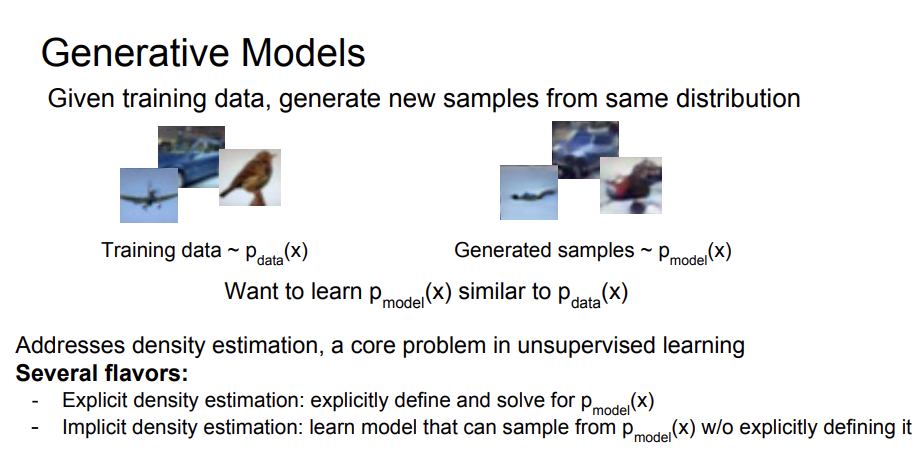

왼쪽 그림엔 분포 p_data로부터 나온 학습데이터가 있다. 우리가 원하는 것은 오른쪽의 p_model이 p_data와 같은 데이터를 생성하도록 학습시키는 것이다. 생성 모델에서는 **"분포 추정"** 다뤄야 한다. 즉 학습데이터의 근본이 되는 분포를 추정해야 한다. 분포 추정에는 몇 가지 전략이 있다.  
* 1. 생성 모델 p_model의 분포가 어떨지 명시적(explicitly) 으로 정의해 주는 방법  
* 2. 간접적(implicit)인 방법  
  
#### ❓ 왜 생성모델(generative models)이 중요할까?  
생성모델은 비지도 학습에서 아주 중요한 문제이다. 데이터 분포로부터, 아주 사실적인(realistic) 샘플들을 생성해낼 수만 있다면 이를 이용하여 아주 많은 것들을 할 수 있다. 생성 모델을 이미지에 적용하면 super resolution이나 colorization과 같은 테스크에 적용할 수 있다. 

### 2) 생성모델의 종류  

다양한 생성모델 중에서도, 현재 연구가 아주 활발하게 이루어지고 있는 세가지 모델만 알아볼 것이다. pixelRNN/CNN, variational autoencoders(VAE), generative adversarial networks(GAN)  

## 3.  pixelRNN/CNN  
pixelRNN/CNN은 fully visible brief networks의 일종이다. 

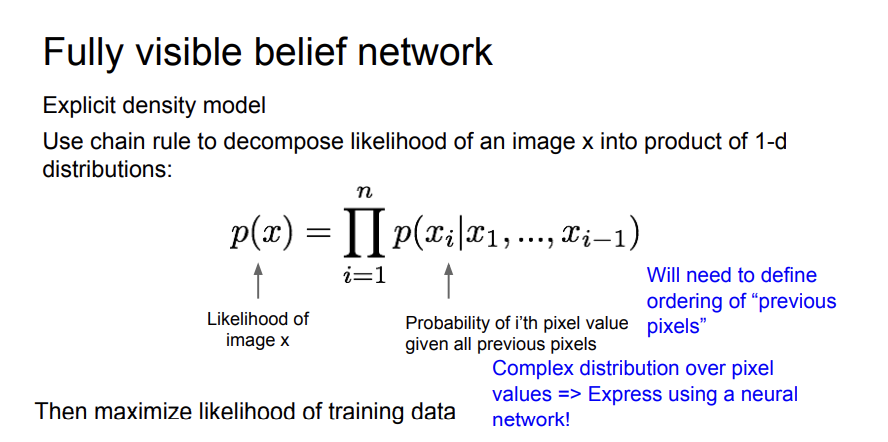

이미지 x에 대한 likelihood인 p(x)를 모델링한다. chain rule로 likelihood를 나타내는 p(x)를 1차원 분포들간의 곱의 형태로 분해(decompose)한다. 이렇게 분해하면, 픽셀 x_i에 대해서 각각
p(x_i│conditions)를 정의할 수 있다.  
여기서 모델을 학습시키려면 학습 데이터의 likelihood를 최대화시키면 되는데, 픽셀 값에 대한 분포를 보면 아주 복잡하다.  
**❓ 이미지 내의 각 픽셀들의 분포를 어떻게 알아낼까?** 일단 복잡한 함수를 표현하기 위해서 신경망을 이용할 것이다.

이 모델은 화살표 방향으로 순차적으로 픽셀을 생성해낸다. 이러한 방향성을 기반으로 한 픽셀들간의 종속성을 RNN(LSTM 모델)을 이용하여 모델링한다. 이런 방식으로 대각선 아래 방향으로 계속 내려가면서 픽셀들을 생성한다.  
단, 한 가지 단점이 있는데, 순차적인 생성 방식으로 아주 느리다는 점이다. 

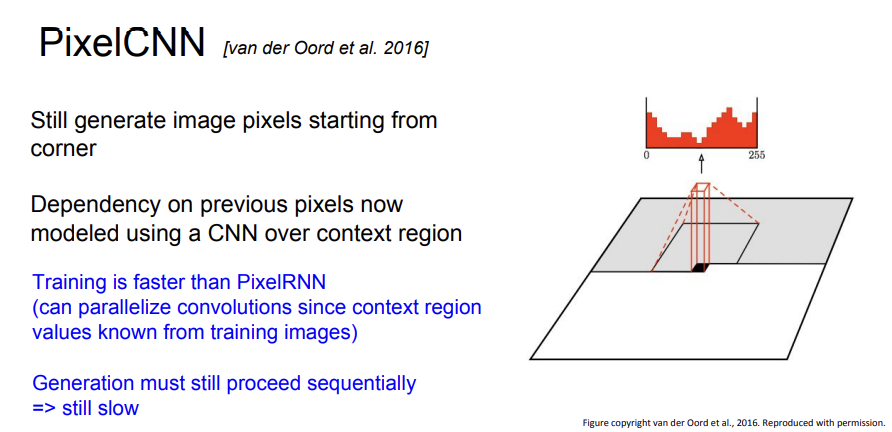

pixelCNN의 기본적인 문제 세팅 자체는 pixelRNN과 동일하다. 왼쪽 코너에서부터 새로운 이미지를 생성할 것이다. pixelRNN과 다른 점은 모든 종속성을 고려하여 모델링하는 RNN 대신에 pixelCNN은 CNN으로 모델링한다는 점이다.  
그림의 회색 지역은 이미 생성된 픽셀들이고, 이들 중에서도 특정 영역만을 사용하여 다른 픽셀 값을 생성한다. PixelCNN에서는 각 픽셀에서 CNN을 수행한다. 픽셀을 생성하는 과정에서 각 픽셀 값은 정답 값(ground truth)을 가지고 있다. 이 정답값은 0-255 사이의 분류(classification) 문제를 풀기 위한 레이블이라고 볼 수 있다. 따라서 CNN에서는 출력 값을 가지고 softmax loss로 학습시킬 수 있다. 

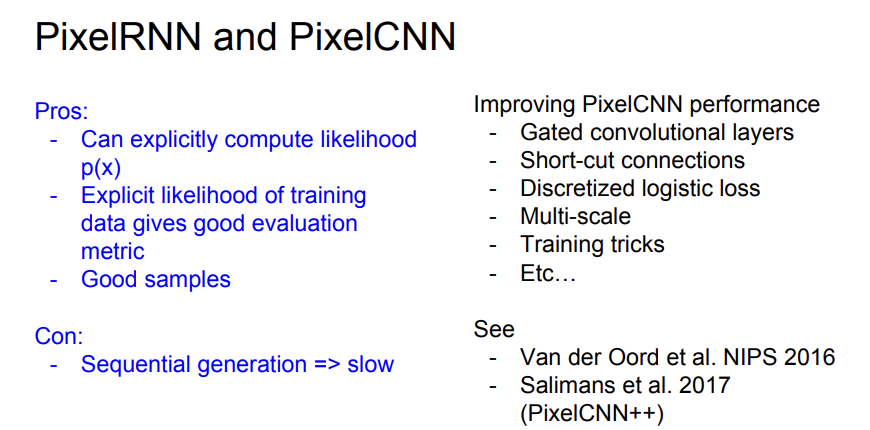

**요약**  
  
* pixelRNN/CNN은 likelihood p(x)를 명시적으로 계산하는 방법이다.  
* 최적화시킬 수 있는 분포를 명시적으로 정의한다.  
* pixelRNN/CNN은 음성생성(audio generation)에도 사용될 수 있다.  
* "evaluation metic"이 존재한다는 장점이 있다.  
* 생성 과정이 순차적이기 때문에 느리다는 단점이 있다.  
  
pixelCNN을 사용하면 pixelRNN보다 학습이 더 빠르다. Train time에서는 (모든 픽셀들에 대해서) 학습 데이터의 likelihood를 최대화하는 것이기 때문이다.  
하지만 새로운 이미지를 생성해야 하는 test time에서는 여전히 코너에서부터 시작해야 하고, 현재 픽셀을 생성하려면 이전 픽셀부터 순차적으로 처리해야 한다. 따라서 학습은 더 빨라졌어도
이미지를 생성하는데 걸리는 시간은 여전히 느리다.

## 4. Variational AutoEncoders(VAE)  
### 1) AutoEncoder
지금까지 살펴본 pixelCNN은 "계산이 가능한 확률모델"을 기반으로 한다. 반면에, VAE의 경우에는 직접 계산이 불가능한(intractable) 확률 모델을 정의한다. 

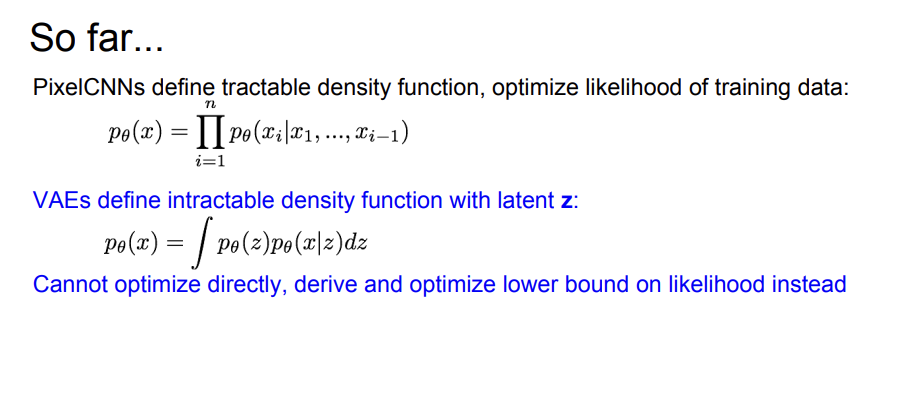

추가적인 잠재 변수(latent variable) z를 모델링할 것이다. VAE에서는 data likelihood p(x)가 적분의 형태를 띄고 있다. 하지만 이 식을 직접 최적화시킬 수는 없다. 대신에 likelihood(p(x))의 하안(lower bound)을 구해서(derive) 최적화시켜야만 한다. 

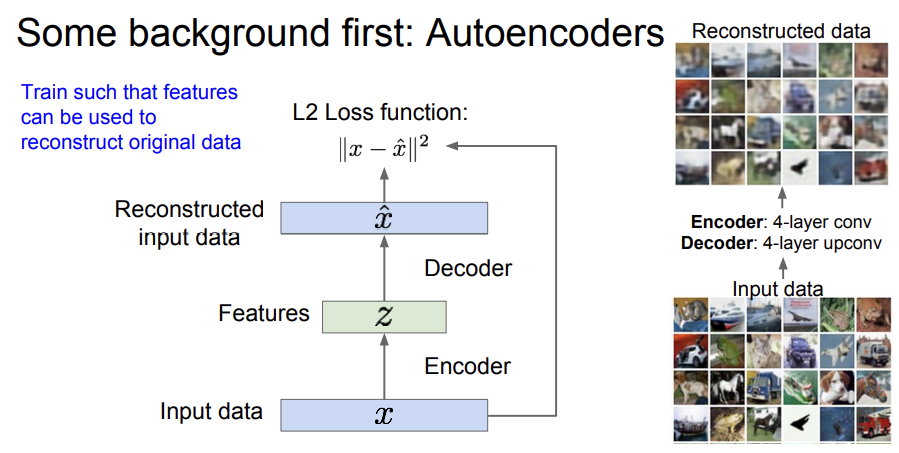

AE는 레이블되지 않은 학습 데이터로부터 저차원의 feature representation을 학습하기 위한 비지도 학습 방법이다. 입력 데이터 x가 있고, 우리는 어떤 특징 "z"를 학습하길 원한다. encoder는 입력 데이터 x를 특징 z로 변환하는 매핑 함수의 역할을 한다. 일반적으로는 Neural network를 사용한다.  
z는 x보다 작아서 AE를 통해 차원 축소의 효과를 기대할 수 있다. AE은 원본을 다시 복원(reconstruct)하는데 사용될 수 있는 특징들을 학습하는 방식을 취한다.  
  
* 1. AE의 과정을 살펴보면, encoder는 x를 더 낮은 차원의 z로 매핑시킨다. z가 바로 encoder 네트워크의 출력이다.  
* 2. 입력 데이터로부터 만들어진 특징 z는 두 번째 네트워크인 decoder에 사용된다. decoder의 출력은 입력 x과 동일한 차원이고, x와 유사하다. decoder는 기본적으로 encoder와 대칭적으로 동일한 구조를 지니고, CNN으로 구성된다.  
CNN모델로 AE를 설계했을 때 encoder는 conv net으로 decoder는 upconv net으로 설계한다.  
* 3. 복원된 이미지와 원본 이미지의 차이를 계산하기 위해서 L2 같은 loss 함수를 이용한다.  

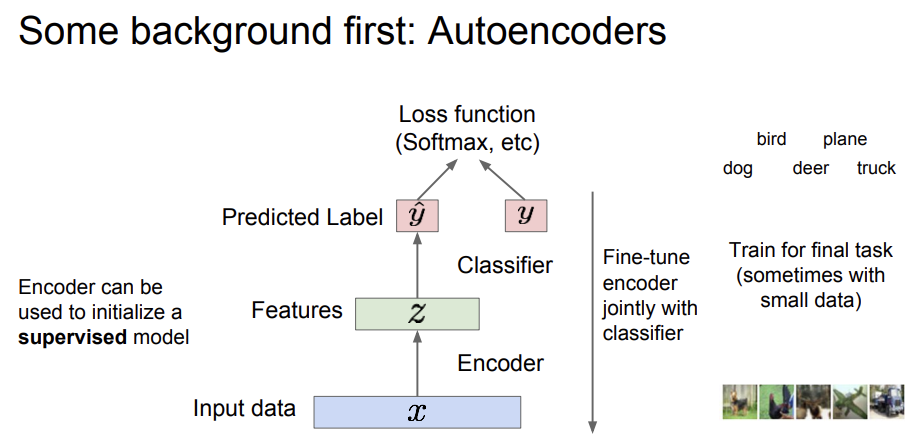

위에 분류기를 붙이면, 클래스 레이블을 출력해야 하는 분류 문제로 바뀌고 이 때 Loss 함수는 softmax를 사용한다. 
  
AE는 레이블링되지 않은 데이터로부터 양질의 general feature representation을 학습할 수 있는 장점이 있다. 학습시킨 feature representation을 데이터가 부족한 지도학습 모델의 초기 가중치로 이용할 수 있다.  

### 2) VAE  
VAE에서는 학습 데이터 xi(i = 1 ~ N)가 있다. 이 학습데이터가 우리가 관측할 수 없는 어떤 잠재 변수 z(latent representation)에 의해 생성된다고 가정한다. 벡터 z의 각 요소들은 데이터의 변동 요소들(some factor of variation)을 잘 포착해낸다. 즉 벡터 z가 다양한 종류의 속성을 담고 있다. 가령 얼굴을 생성할 때의 특성이라고 하면 생성된 얼굴이 얼마나 웃고 있는지, 눈썹의 위치,  머리의 방향 등의 속성들이 모두 학습될 수 있는 잠재된 요소라고 할 수 있다.  
  

z에 대한 prior로부터 샘플링을 수행한다. 여기서 **prior** 는 확률 분포 관점에서 어떠한 event가 일어날지에 대한 기대값을 의미한다. 얼마나 웃고 있는지와 같은 속성을 담기 위해서는 이러한 속성들이
어떤 distribution을 따르는지에 대한 prior를 정의해야 한다. 보통 prior를 선택할 때 가우시안 분포를 사용하여 표현한다.  
  
여기에는 파라미터가 2가지 있다.  
* Prior distribution
* Conditional distribution
  
생성 모델을 잘 만들기 위해서는 θ∗의 파라미터 값들을 잘 추정해야 한다. 그러면 이 모델을 어떻게 설계해야 할까?  
prior에 대해서는 gaussian과 같은 단순한 모델을 선택하지만, conditional distribution은 좀 더 복잡한 함수로 neural network로 모델링한다. 

이렇게 설계된 decoder는 어떤 잠재 변수(z)를 받아서 이미지로 디코딩하는 역할을 한다. 모델의 파라미터들을 추정하기 위해 모델을 학습시켜야 한다. 가장 쉬운 방법은 모델 파라미터가 학습 데이터의 likelihood를 최대화하도록 학습시키는 것이다. VAE의 경우에 p(x)를 모든 z에 대한 기댓값으로 나타낸다.  

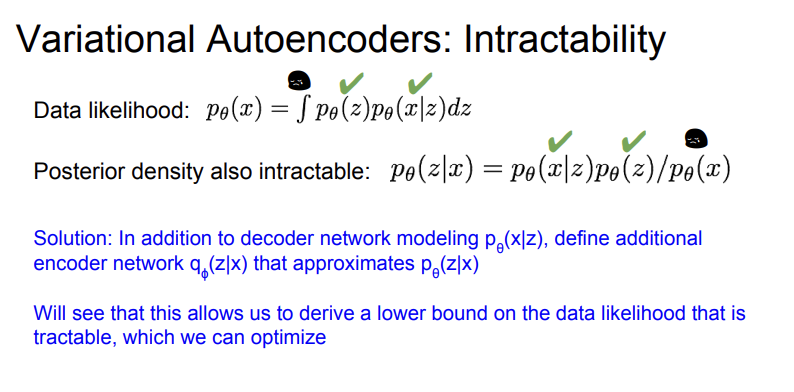

이 likelihood p(x)를 최대화시키려고 할 때 문제가 있다. p_θ(x)의 적분식을 계산할 수 없다는 것이다. p_θ(x|z)를 구하려면 모든 z에 대해 알아내야 하는데, 모든 z를 알아낼 수 없다! 여러모로 p(x)를 직접 최적화하기는 힘들다.  
이 모델을 학습시키기 위한 해결책으로 decorder network(p(x|z)) 말고도 추가적인 encoder network를 정의하는 방법이 있다.

VAE에서 우리가 하고싶은 것은 데이터의 확률론적 생성(probabilistic generation)모델을 만드는 것이다. 위에서 다뤘던 autoencoder에서는 endoer에서 입력 x를 받아 z를 만들고 decoder에서 z를 받아 다시 이미지를 생성했다. VAE도 기본적으로 encoder/decoder 구조로, 여기에 확률론적인 의미가 추가된다.  
  
encoder network 구조부터 보면, x의 출력은 평균과 공분산(mean & diagonal covatiance of z given x) 두 가지이다. decoder network의 출력 또한 평균과 (대각)공분산 두 가지이다.  
decoder에는 파라미터 theta가 있다. "z given x" 와 "x given z"를 얻으려면 이들의 분포로부터 샘플링해야 한다. 따라서 encoder/decoder network는 각각 z와 x에 대한 분포를 생성하고 실제 값을 뽑아내기 위해 이 분포로부터 샘플링을 한다.  
  
encoder network는 "recognition/inference network"라고 부르기도 한다. encoder는 (z given x) 라는 잠재 변수를 "추론하는 (inference)" 네트워크이기 때문이다. decoder는 "generation network"라고 하기도 한다.  

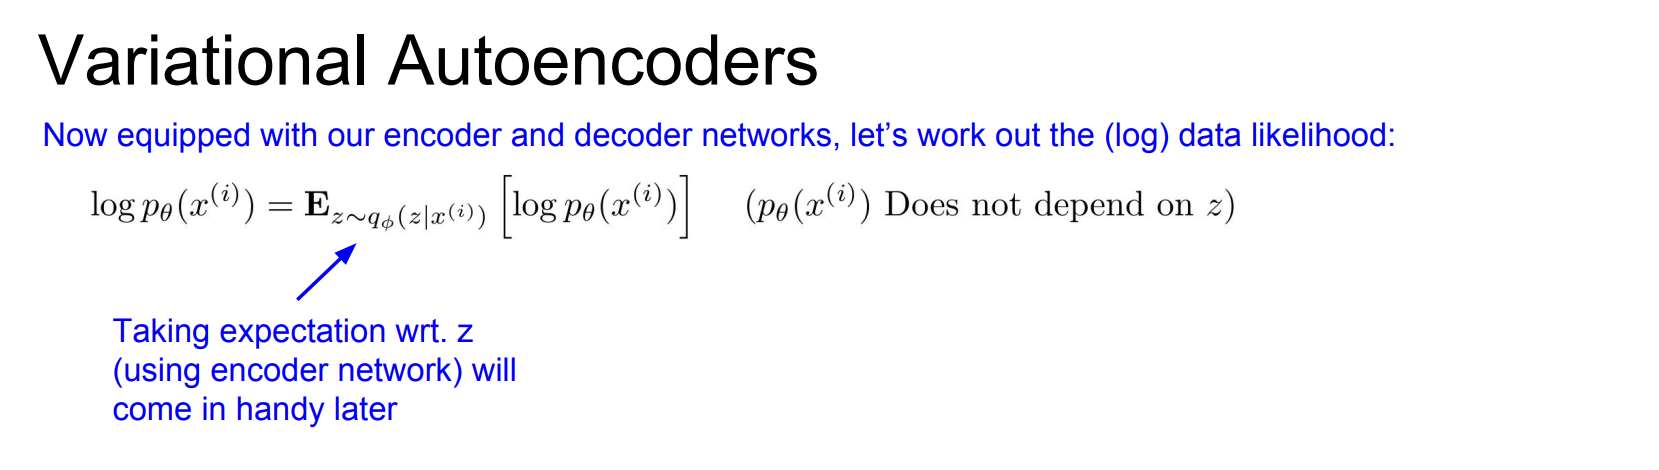

1. 이제 encoder/decoder networks를 세팅했으니 다시 data likelihood 문제로 돌아가보자. 우선 data likelihood인 p(x)에  log를 취한다. (log p(x)) 그리고 p(x)에다가 z에 대한 기댓값(expectation)을 취한다. z는 encoder network로 모델링한 q(z given x) 분포로부터 샘플링한 값이다. 

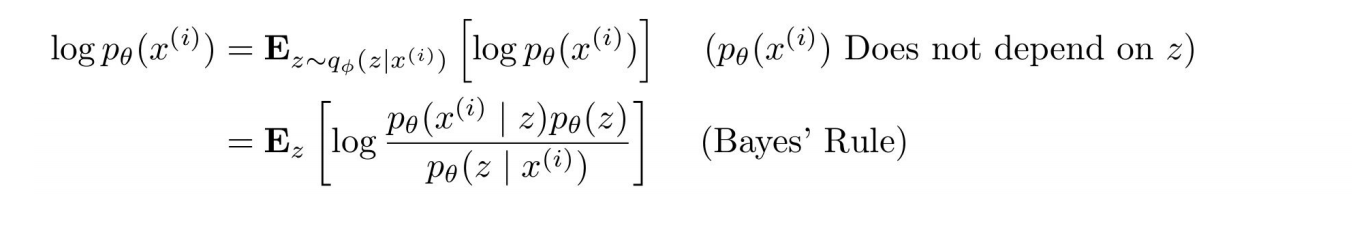

2. 1번 식에 베이즈 룰을 적용한다. (log[p(x given z) p(z) / p(z given x)])

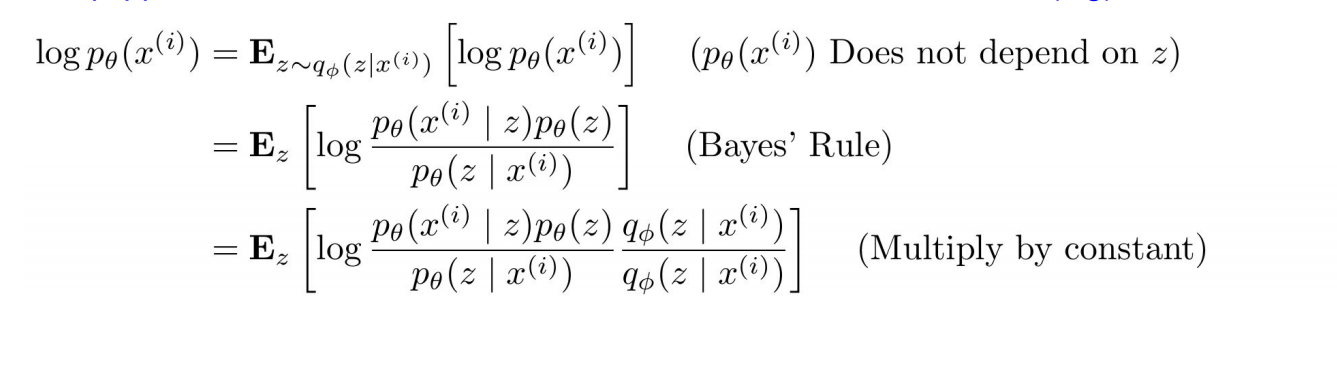

3. 여기에 어떤 상수(q(z given x)/q(z given x)=1)를 곱해준다. (Multiply by constant)

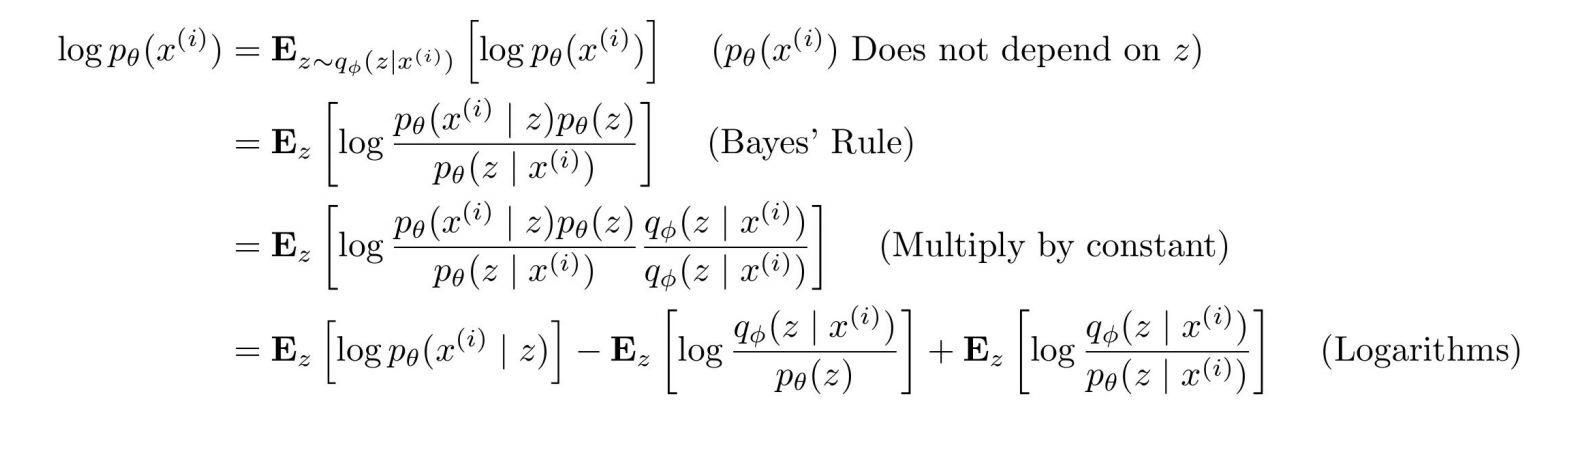

4. 3번에서 구한 식을 기본적인 로그 공식을 이용해서 세 개의 항으로 나눠준다. 이렇게 나눠주면 세 개의 항을 각각 다르게 해석할 수 있게 된다. 

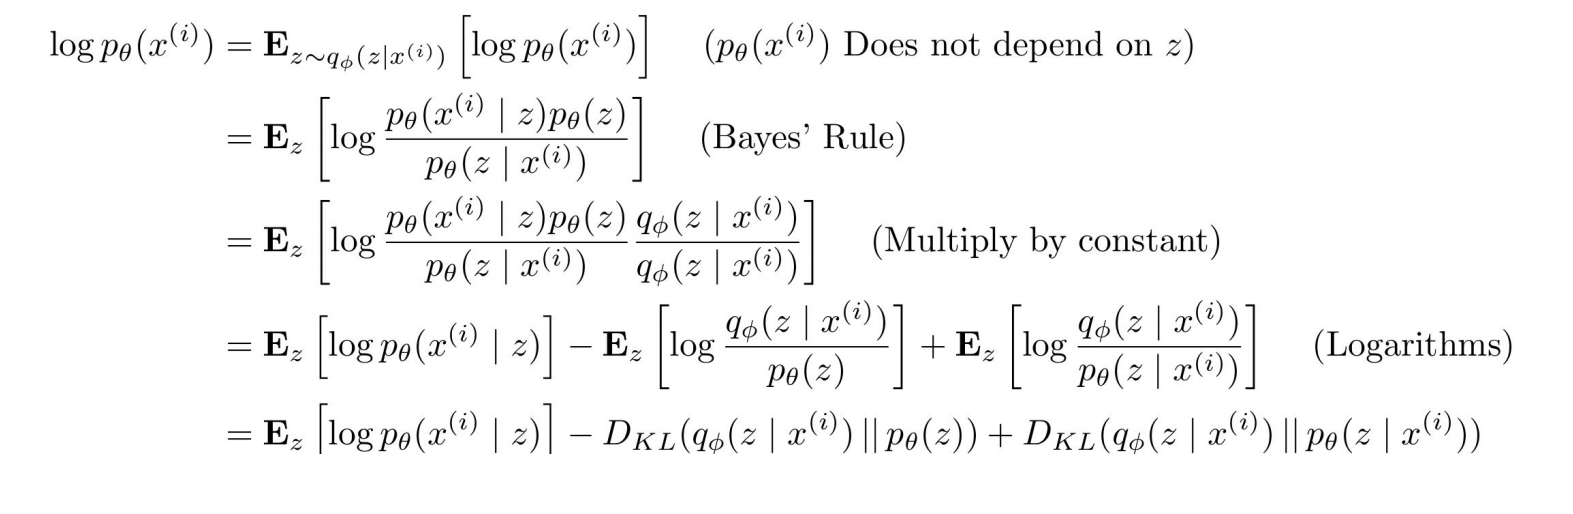

5.  
* 1. 첫 번째 항은 E[log p(x given z)]  
  * p(x given z)는 decoder network  
  * 첫 번째 항은 샘플링을 통해서 계산할 수 있음  
  * 샘플링 과정에서 미분이 가능하도록 하는 "re-parametrization trick" 기법 사용  
* 2. q(z given x)와 p(z)간의 KL 항  
  * q(z given x)는 encoder에서 발생하는 분포로 평균/공분산을 가지는 가우시안 분포이고, prior p(z) 또한 가우시안  
  * KL divergence 에서 두 개의 분포가 모두 가우시안이면 closed form solution으로 풀 수 있음  
  * KL divergence는 두 분포가 얼마나 가까운지를 알려줌  
* 3. q(z given x)와 p(z given x)간의 KL  
  * p(z given x)는 계산할 수 없는 항 (untractable) ~> p(z given x)를 계산할 수 없었기 때문에 q로 근사시킴  

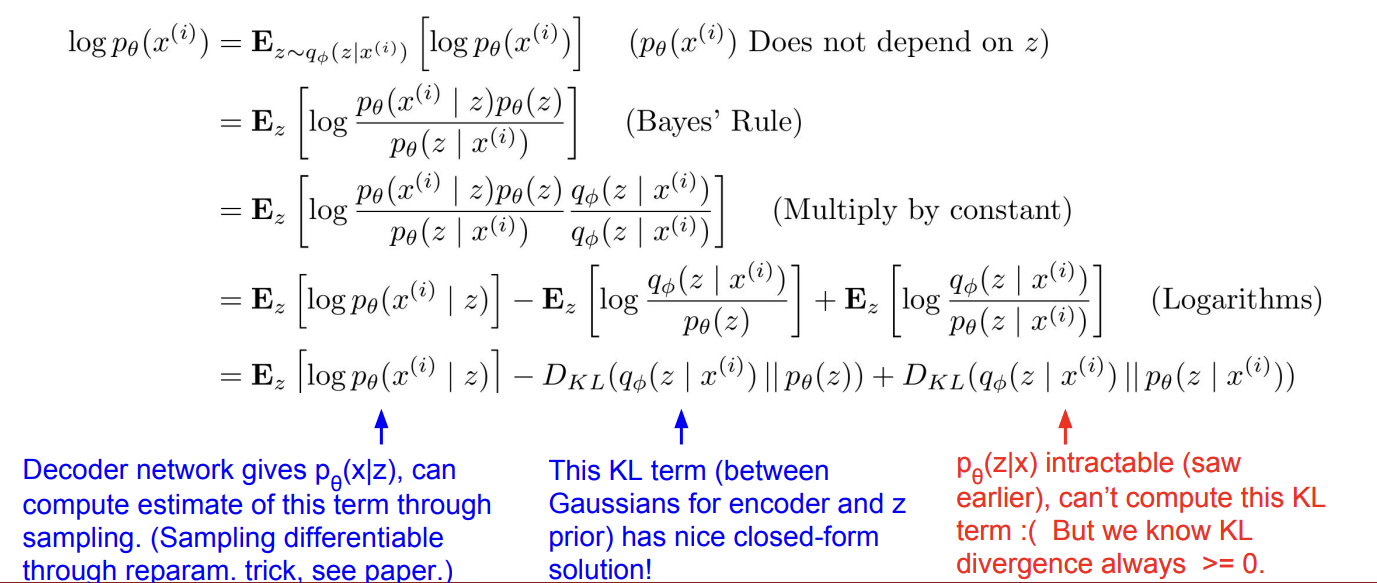

6. 앞의 두 항은 그래디언트를 이용해 최적화시켜서 lower bound로 만들 수 있다. p(x given z)는 미분가능하고 (1),  두번째 KL 항도 close form solution 으로 미분가능 (2)  

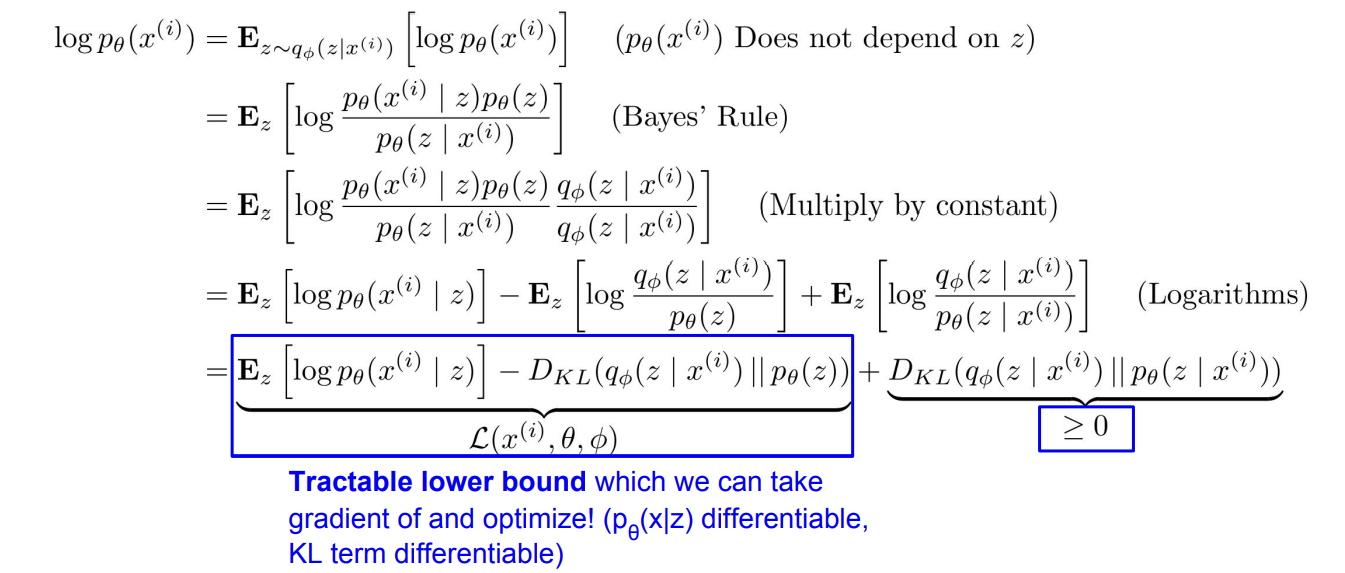

6-2. "Tractable lower bound"인 이유는, 세 번째 항이 0보다 크거나 같이 때문이다.

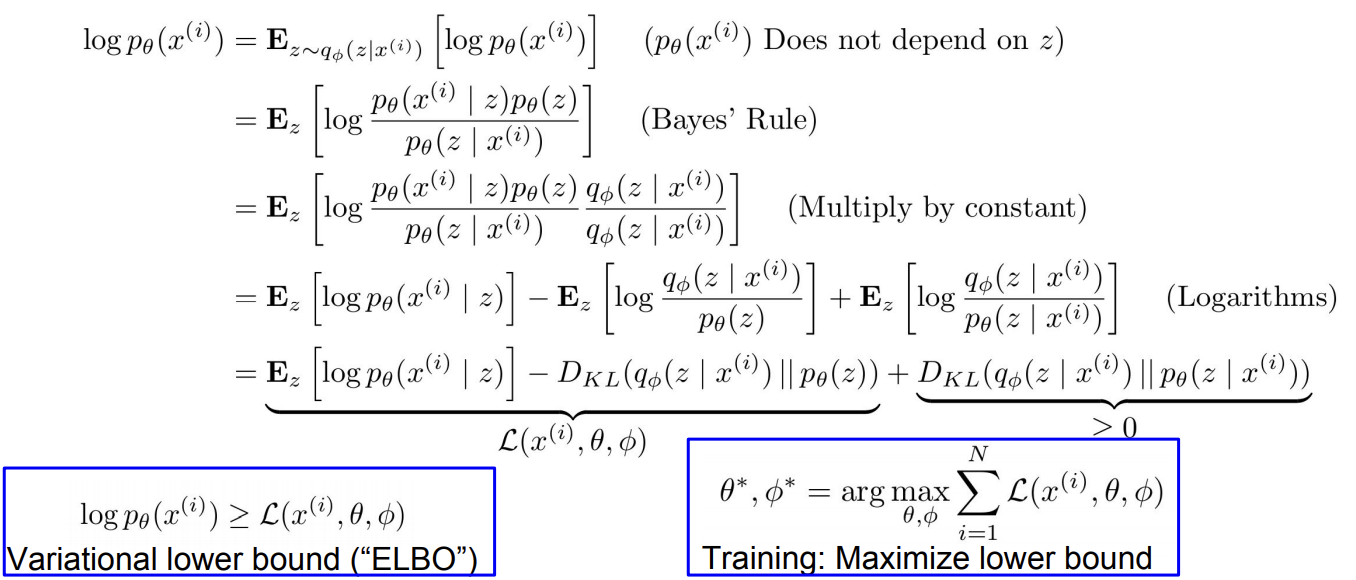

7. VAE를 학습시키기 위해서는, 앞서 구한 lower bound가 최대화되도록 최적화시키면 된다. 즉, data likehood의 lower bound를 최적화시키는 것이다. lower bound를 최대화시키기 위해서는 파라미터 theta와 phi를 구해야 한다.  
  
**다시 위에서 한 것들을 정리해보면,**  
👉첫 번째 항은 모든 샘플 z에 대한 기댓값(expectation)이다. z는 encoder의 출력이다. encoder로 z를 샘플링하고, 모든 z에 대해서 p(x given z)의 기댓값을 구한다. 첫 번째 항의 값이 크다는 것은 likelihood p(p given z)가 크다는 것이고, 이는 데이터를 잘 복원해내고 있다는 것을 의미한다.  
👉두 번째 항인 KL divergence는 그 값이 작아야 한다. 우리가 근사시킨 분포(q)와 prior의 분포(p)가 최대한 가까워야 한다. 잠재 변수 z의 분포가 prior 분포(가우시안)와 유사해야 한다.  

#### VAE를 학습시키는 과정  

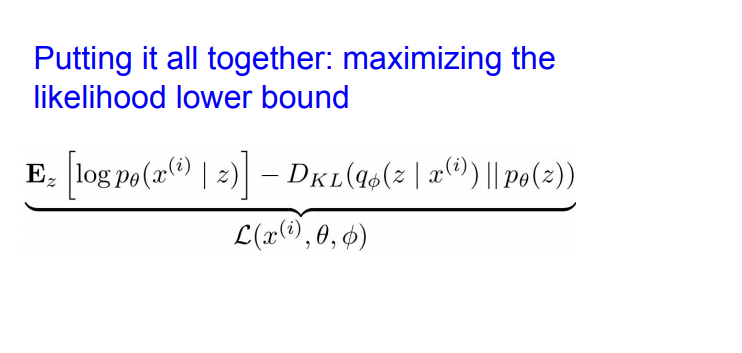

우리는 이 lower bound를 최대화하길 원한다. 우선 forward pass 과정부터 살펴보자. 

입력 데이터 x를 encoder에 통과시켜서 q(z given x)를 얻는다. q(z given x)를 구했으면 이 분포로부터 잠재 변수 z를 샘플링한다. 그리고 샘플링한 z를 decoder에 통과시킨다. decoder network의 출력 p(x given z)에 대한 평균과 분산이다. 이 분포를 바탕으로 샘플링을 하면 샘플 출력이 만들어질 것이다. 그리고 training time에는 log p(학습 이미지 given z)가 최대가 되도록 학습하면 된다. 이런 식으로 모든 미니배치에 대해서 forward pass를 계산한다.  
  
이렇게 구한 모든 항은 미분이 가능하므로 backprop 할 수 있다. 그레디언트를 계산하여 encoder/decoder의 파라미터 phi와 theta를 업데이트하고 이를 통해 train data likelihood 를 최대화시킨다. 

#### 데이터를 생성하는 과정

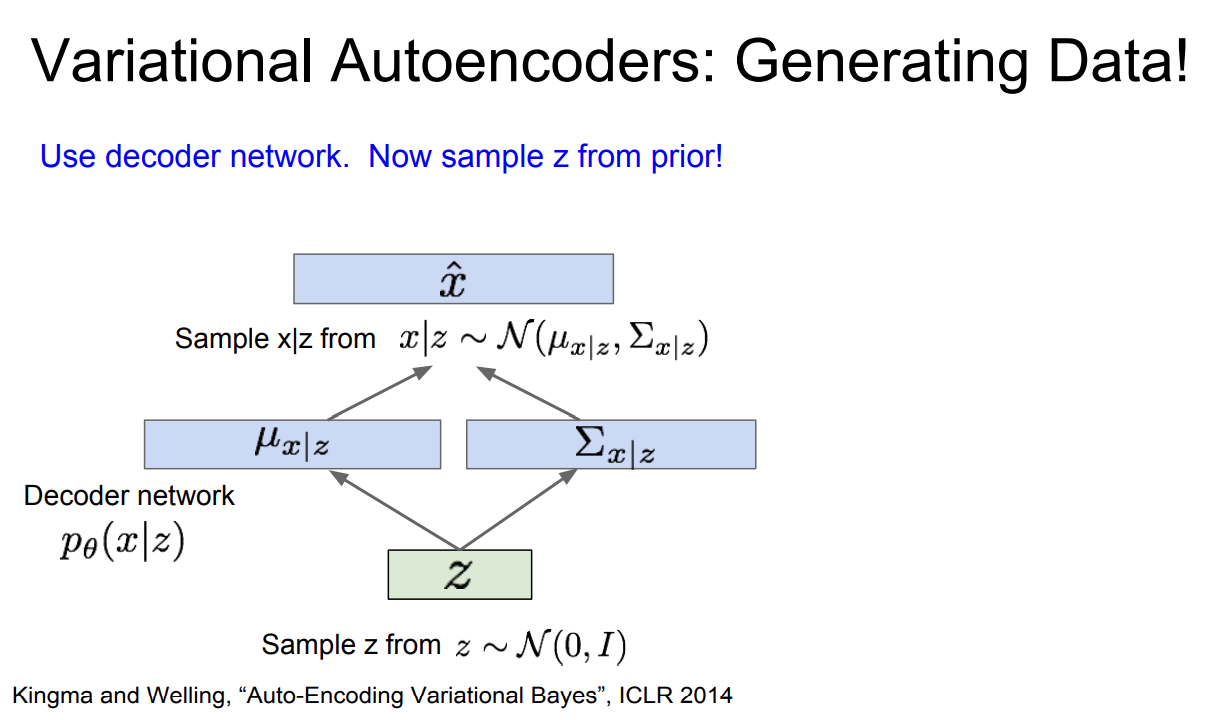

VAE를 학습시키고나면 데이터 생성 시에는 decoder network만 필요하다. 생성과정에서는 prior(Gaussian)에서 샘플링한다. 그리고 이를 바탕으로 데이터 x를 샘플링한다. prior z는 diagonal covariance를 가정했기 때문에 (**각 차원을 independent 하다고 가정**) z의 각 차원이 독립적이며 이로 인해 각 차원마다 해석가능한 요소들이 독립적으로 인코딩될 수 있다. 

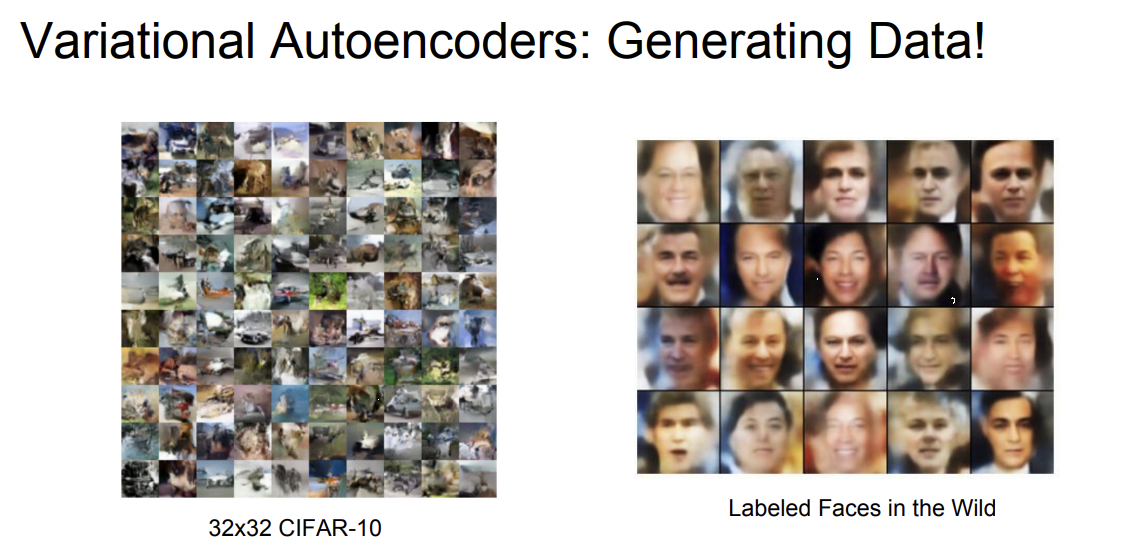

일반적으로 VAE가 이미지들을 잘 생성해 내기는 하지만 가장 큰 단점이 VAE로 생성한 이미지들은 원본에 비해서 블러(blurry)하다는 것이다. 

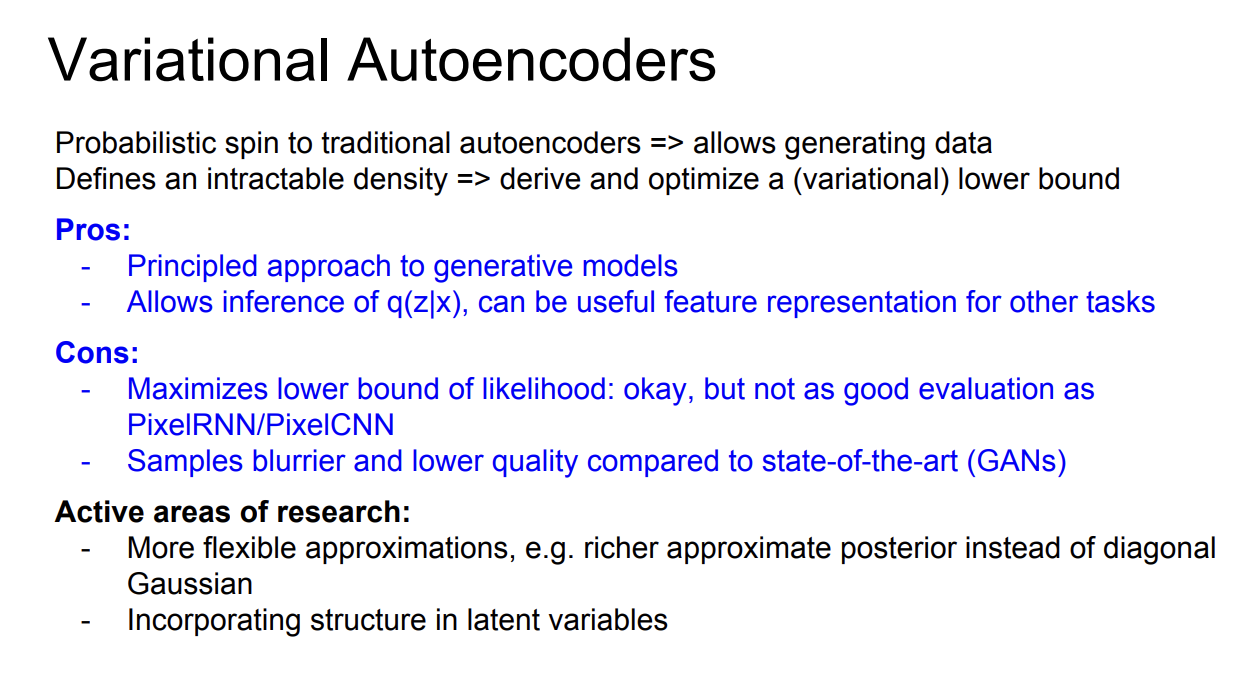

**VAE를 요약하자면,**  
- VAE는 autoencoders의 확률론적 변형 버전이다.  
  
AE는 deterministic하게 x를 받아 z를 만들고 다시 x를 복원했다면 VAE는 데이터를 생성해 내기 위해서 분포와 샘플링의 개념이 추가되었다. 그리고 계산할 수 없는(intractable) 분포를 다루기 위해서
하안(lower bound)를 계산했다. "variational"은 계산한 수 없는 형태를 계산할 수 있도록 근사시키는 방법을 의미한다.( p(z given x) 를 계산못하니 q(z given x)로 근사)  
- VAE와 같은 접근방식의 이점은 생성 모델에 대한 원칙적 접근(principled approach) 방법이라는 점과 모델에서 q(z given x)를 추론한다는 점이다.  
- q(z given x)은 다른 테스크에서도 아주 유용한 feature representations이 될 수 있다.  
- likelihood의 하안(lower bound)을 계산한다는 점 때문에 pixelRNN/CNN 같이 직접 최적화하는 방법보다는 엄밀하지 않다.  
- GAN과 같은 다른 SOTA 생성모델에 비해서는 생성된 샘플이 블러하고(blurry), 퀄리티가 낮은 경향이 있다. 

## 5. Generative Adversarial  Networks (GAN)  
### 1) 개요

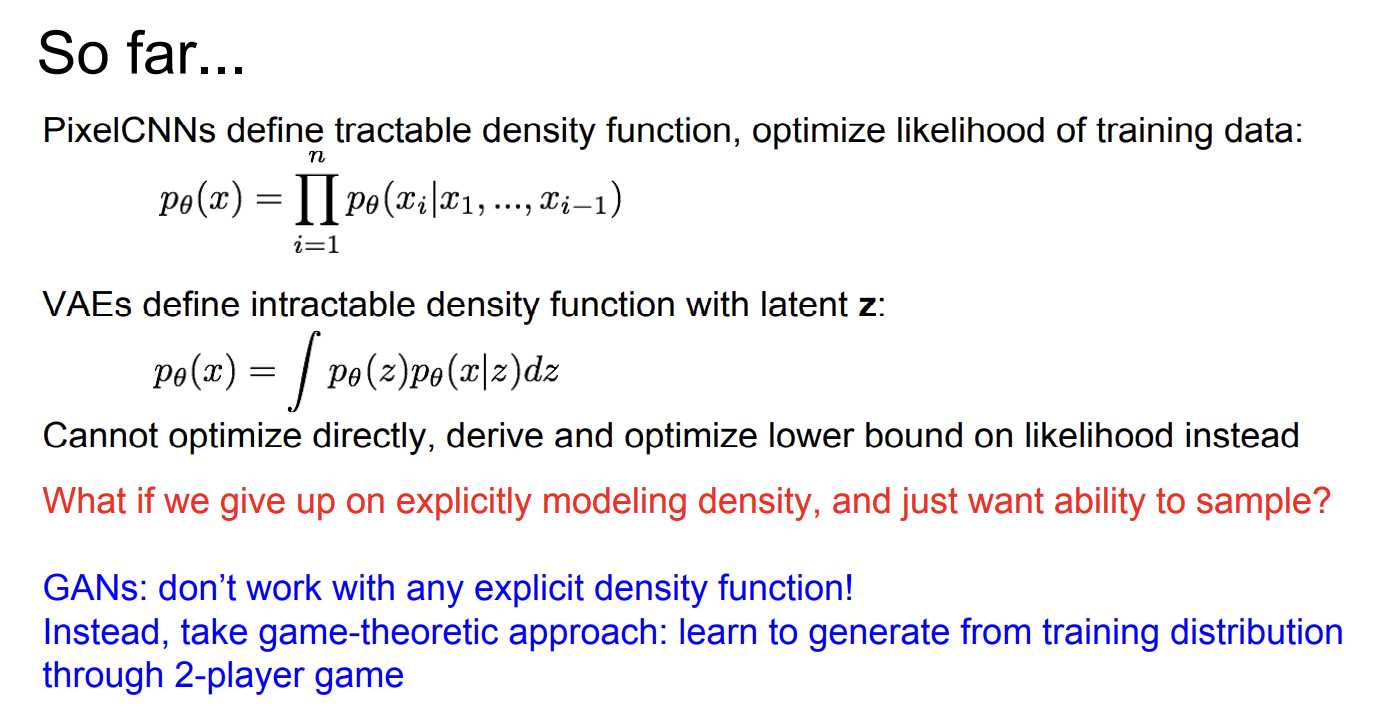

위에서 pixelRNN/CNN은 계산 가능한(tractable) 확률분포(density)를 가정했다. 그리고 이를 이용해서 학습 데이터의 likelihood를 최적화시켰다. 반면 VAE의 경우는 잠재변수 z를 두고 생성 과정을 정의했다. 잠재변수 z는 많은 이점이 있지만, 결국 VAE는 계산할 수 없는(intractable) 확률분포를 가정하기 때문에 likelihood를 직접 최적화시키지 못하고 대신 하안(lower bound)을 최적화시켰다.  
  
그렇다면 확률분포를 직접(explicitly) 모델링하는 방법을 아예 포기하면 어떨까? 어떤 방법이든 생성모델이 우리가 가진 분포에서 샘플링만 잘하면 된다. 이런 접근법이 바로 **GAN**이다.  
GAN에서는 우리가 직접 확률분포를 모델링하지 않는다. GAN에서는 게임이론의 접근법을 취한다. GAN에서는 2-player game 이라는 방식으로 학습 분포를 학습한다. 

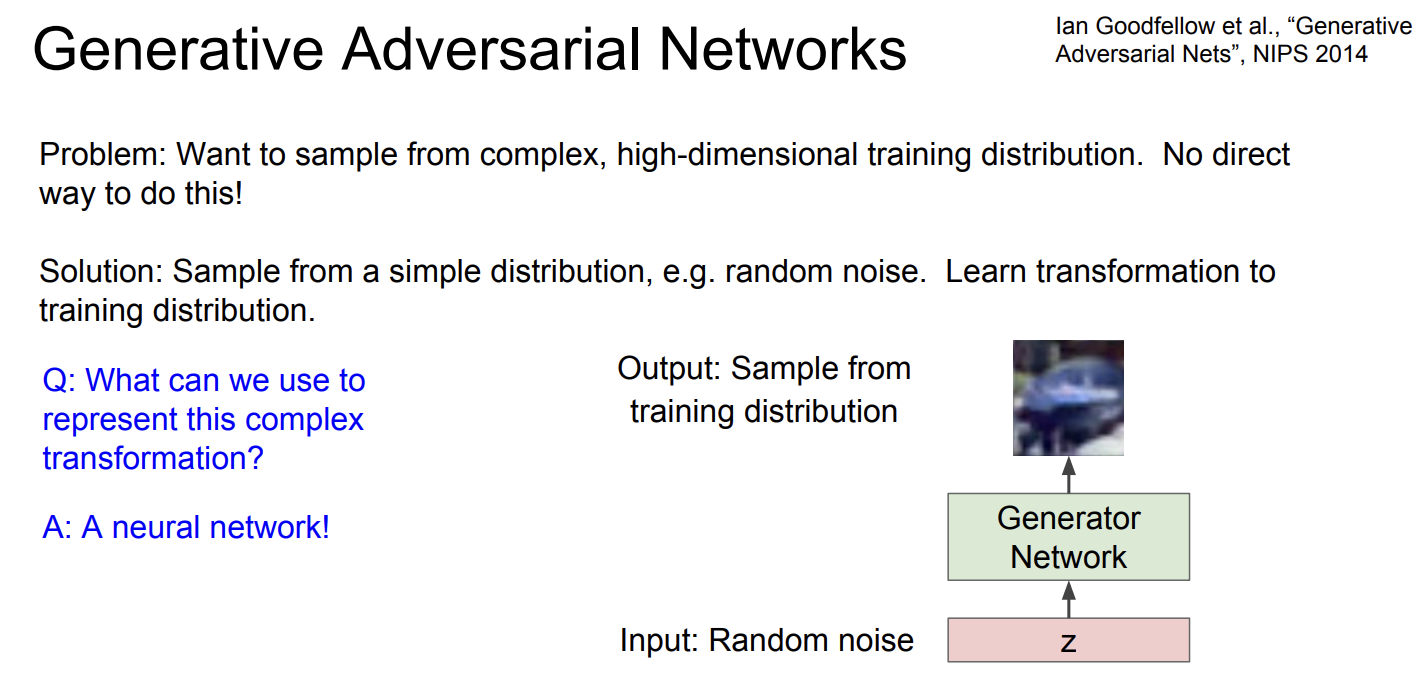

GAN에서 하고자 하는 것은 복잡한 고차원 학습 분포로부터 샘플링을 하는 것이다. 하지만 우리가 가진 분포가 아주 복잡하기 때문에 여기에서 직접 샘플링을 하는 것은 불가능하다.  
  
GAN에서는,  
gaussian random noise같은 더 단순한 분포에서는 샘플링을 할 수 있을 것이라는 아이디어를 이용한다. 그리고 단순한 분포에서 우리가 원하는 학습 분포로 변환(transformation)하는 함수를 배우고자 한다.  
보통 복잡한 함수나 변환를 모델링할 때 neural network를 사용한다. GAN에서는 입력으로 random noise 벡터(z)를 받는다. 벡터의 차원은 직접 명시해준다. 그리고 입력z가 생성 네트워크를 통과하면 학습 분포로부터 직접 샘플링된 값을 출력한다. 

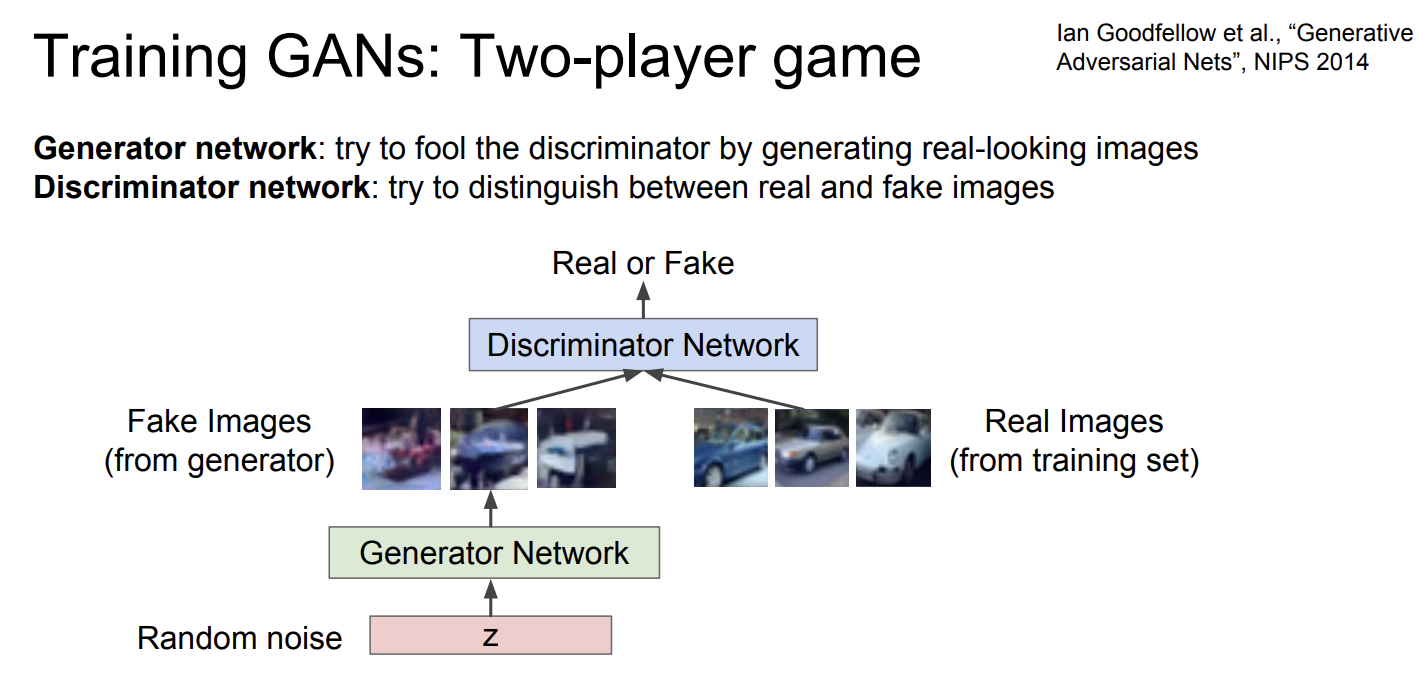

GAN을 학습시키는 방법으로 two player game 방법을 이용한다. 두 명의 플레이어 generator와 discriminator가 있다. generator는 "플레이어1" 로 참여하여 사실적인 이미지를 생성하여 discriminator를 속이는 것이 목표이다. "플레이어2"인 discriminator 는 입력 이미지가 실제인지 거짓인지를 구별하는 것이 목표이다.  
  
random noise가 generator의 입력으로 들어간다. generator는 이미지를 생성해 내는데, 이 이미지는 generator가 만들어낸 "fake images"이다. 그리고 학습 데이터에서 나온 "real images"도 있다. discriminator의 출력은 이미지가 진짜(real)인지 가짜(fake)인지이다.  
  
GAN의 아이디어는 discriminator가 잘 학습돼서 진짜인지 가까인지를 아주 잘 구별할 수 있다면 generator는 discriminator를 속이기 위해서 더 실제같은 가짜 이미지를 만들 수 있어야 한다는 것이다. 이를 통해 성능이 아주 좋은 generative model을 만들 수 있다. 

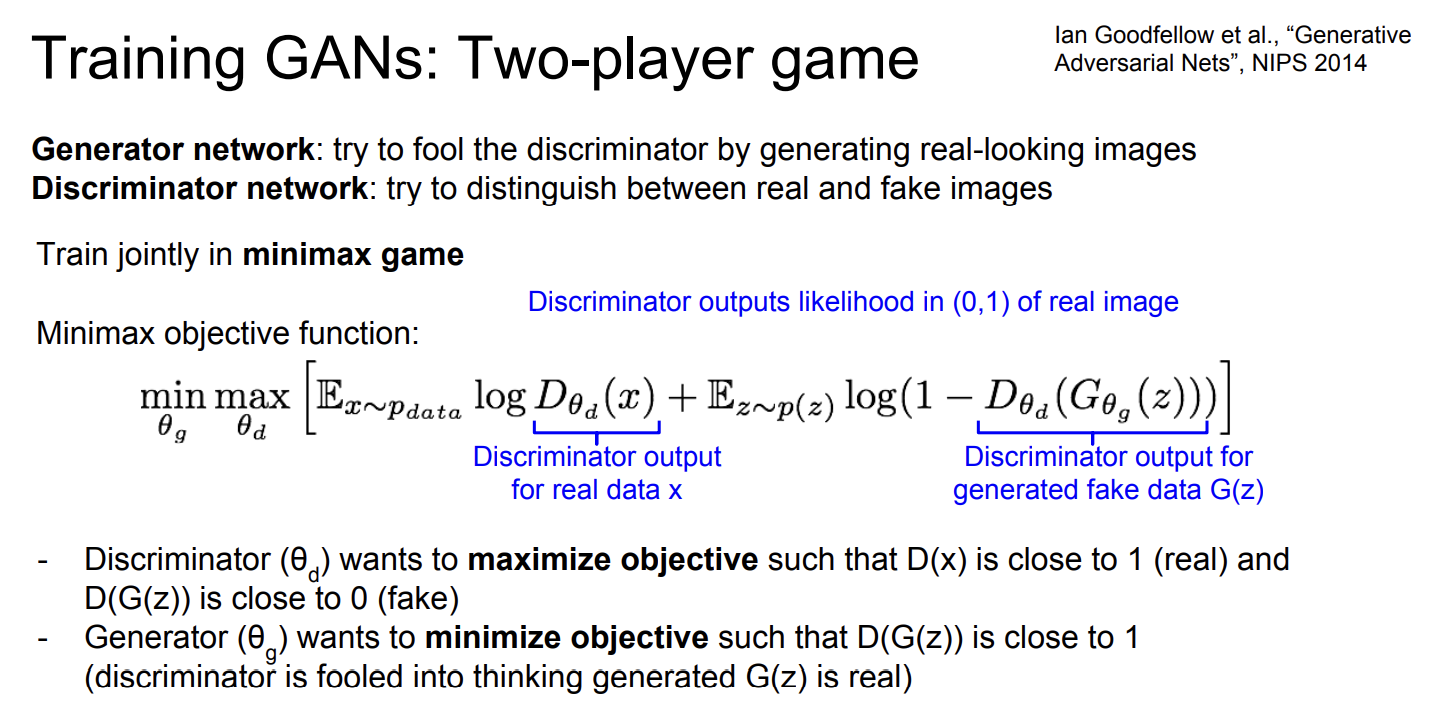

이제는 두 플레이어를 "minimax game"의 형태로 같이(jointly) 학습시킬 것이다. "Minimax objective function"에서는 generator network 인 G의 파라미터인 theta_g를 최소화시켜야 한다. 반면 Discriminator network인 D의 파라미터인 theta d는 최대화시켜야 한다.  
  
minmimax objective function를 보면,  
* 데이터에 대한 Expectation E[log D(x)]가 있다. log D(x)는 실제(real) 데이터 x에 대한 discriminator의 출력값으로, 실제 데이터(x)가 데이터 분포 p_data에 속할 likelihood이다.  
* 두 번째 항에서 z ~ p(z)는 generator에서 샘플링한다는 의미이다. 그리고 D(G(z))는 생성된 가짜 이미지(G(z))에 대한 discriminator의 출력이다.  
  
✅ 우리가 하려는 것을 다시 생각해보면,  
우선 discriminator는 objectrive function을 최대화하기 위해 최대화시키는 파라미터 theta d를 찾아야 한다. D(x)의 경우에는 실제 데이터이므로 값이 1에 가까울수록 좋고, D(F(x))는 가짜 데이터에 대한 것이므로 0에 가까울수록 좋다.  
반면에 generator는 objective functuon이 작을수록 좋으므로 D(G(z))가 1에 가까울수록 좋다. 1 - D(G(z))가 0에 가까워지는데, 이는 discriminator가 가짜 이미지를 진짜라고 잘못 분류하고 있다는 의미이다. 즉, generator가 진짜같은 이미지를 잘 만들고 있다는 것이다. 

#### GAN 학습시키는 과정  

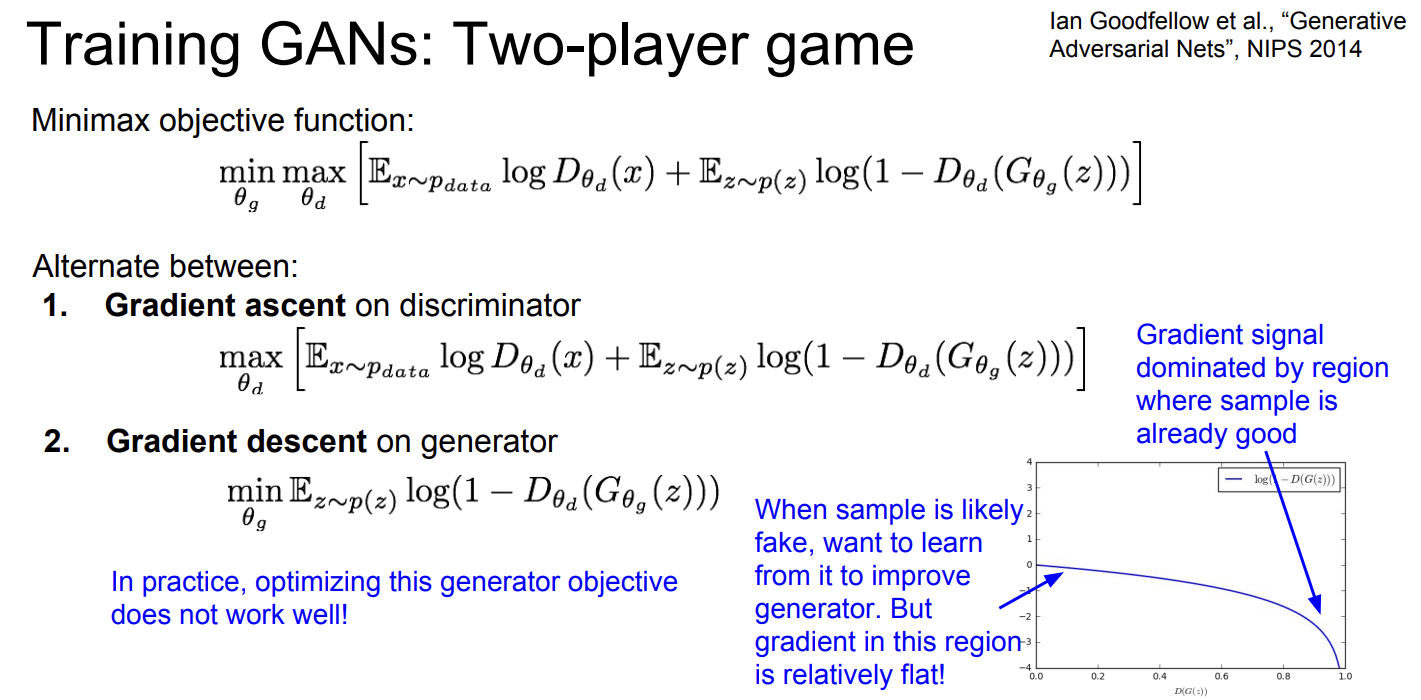

GAN의 train시키는 과정에서 generator와 discriminator를 번갈아가면서 학습시킨다.  
**discriminator**의 경우에는 objective function이 최대가 되는 theta를 학습하기 위해 gradient ascent를 이용한다.  
**generator**는 반대로 gradient descent를 이용한다. gradient descent를 통해서 파라미터 theta_G를 학습시켜 object function이 최소가 되도록 한다.  
  
하지만, 실제로는 generator의 objective function이 학습이 잘 안되는데 그 이유는 loss landscape을 살펴보면 알 수 있다. 위 그림의 오른쪽 하단의 그래프가 D(G(x))의 loss landscape이다. generator는 (1 - D(G(x)))의 값이 높을수록 좋다. 우리는 Loss가 최소가 되길 원하는데 Loss의 기울기가 오른쪽으로 갈수록 점점 커진다. 이는 discriminator가 generator를 잘 속이고 있으면 그레이언트도 점점 더 커진다는 의미이다.  
반면 생성된 샘플이 좋지 않을 때, 즉 generator가 아직은 잘 학습되지 않은 경우라면 discriminator가 쉽게 구분할 수 있는 상태이므로 X축 상에서 0 근처인 상태이다. 이 지점에서는 그레디언트가 상대적으로 평평하다. 이것이 의미하는 바는 그레디언트가 generator가 생성을 이미 잘 하고 있는 지역에만 몰려있다는 것이다.  
  
하지만 우리는 샘플이 안 좋은 경우에 gradient가 크게, 즉 학습을 많이 할 수 있어야 하기 때문에 generator를 학습시키기는 상당히 어렵다. 이를 해결하기 위해 genrator에서도 gradient ascent를 이용할 것이다. discriminator가 정답을 잘 맞출 likelihood를 최소화 시키는 방법 대신에 **discriminator가 틀릴 likelihood를 최대화 시키는 쪽으로** 학습시킬 것이다. 

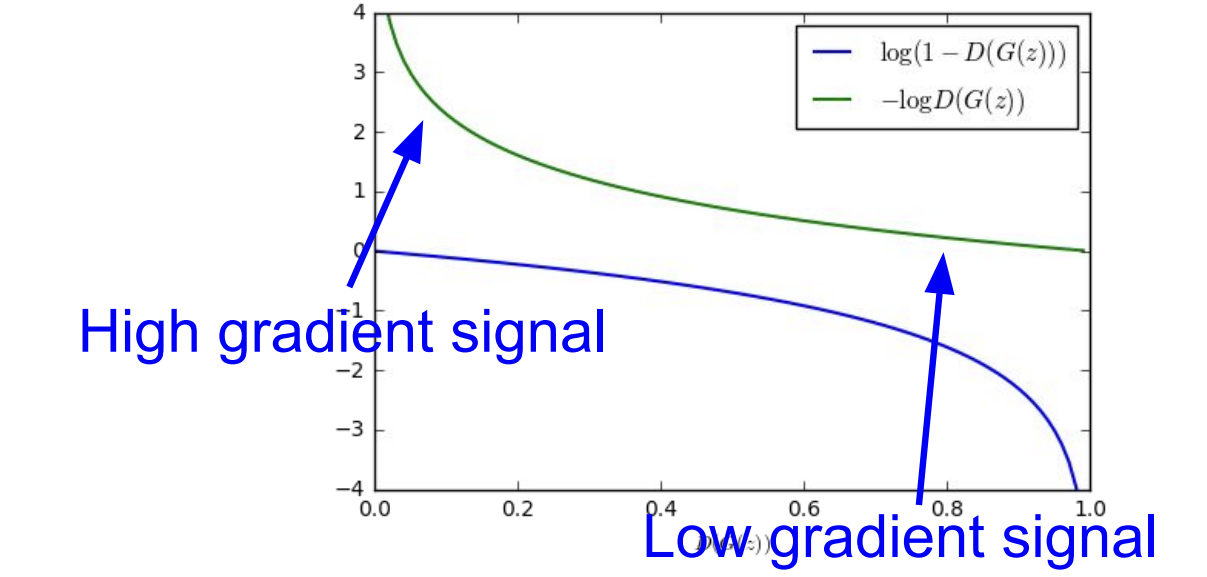

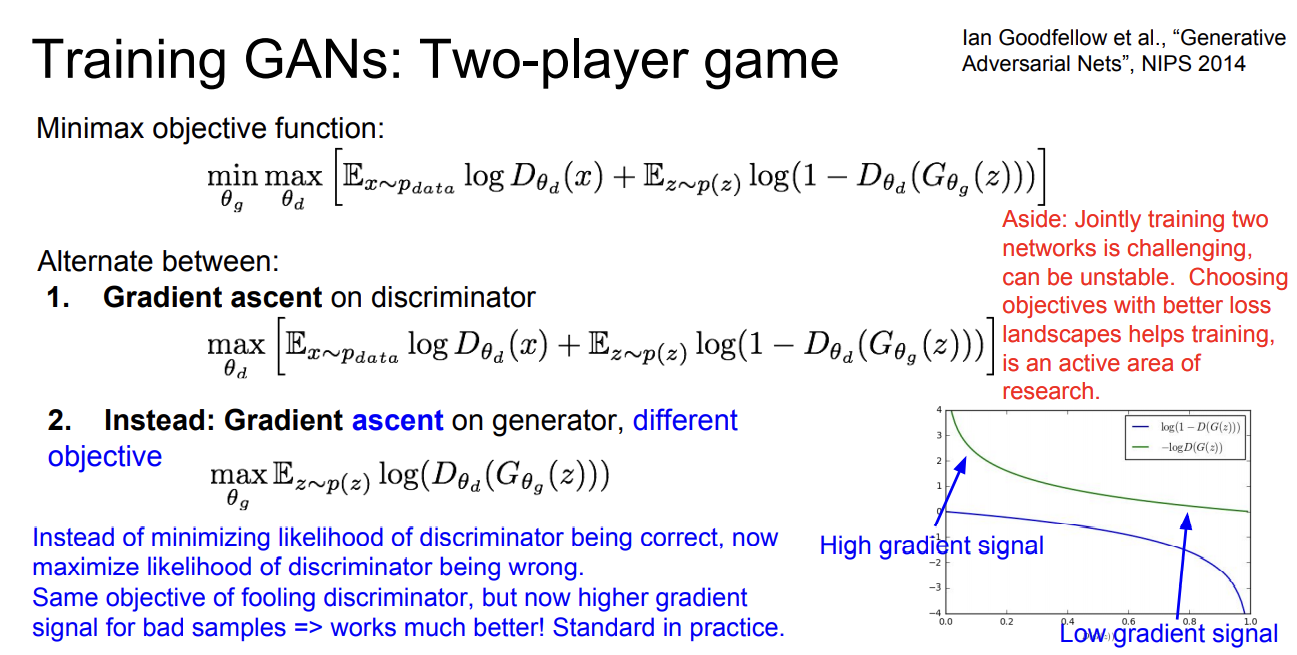

초록색 그래프를 보면, Generator를 최적화할때 뒤집어진(flip)
object function을 최대화시킬 것이다. 안 좋은 샘플들을 만들어내는 곳에서 더 많은 학습이 이루어질 수 있게 되었다. vanilla GAN의 수식을 따르는 대부분의 GANs은 이 objective function을 사용하고 있다. 

#### 전체 GAN 학습 알고리즘

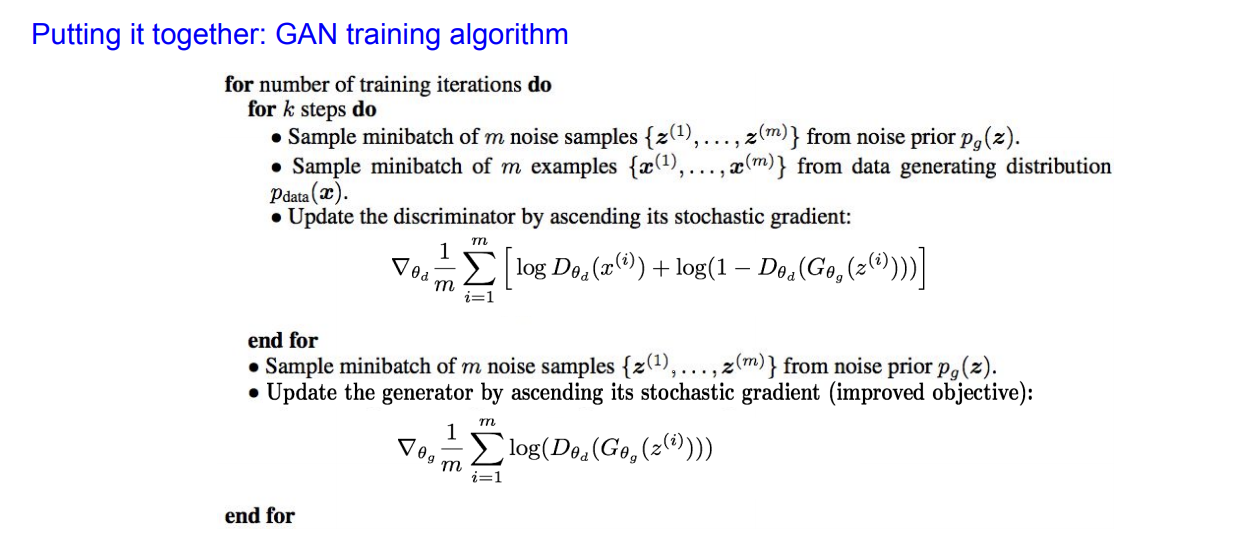

학습 순서는 우선 discriminator을 조금 학습시키고 그 다음 generator를 학습시키는 방식이다.  
  
**Discriminator 학습 과정**  
우선 k번 만큼 discriminator를 학습시킨다. noise prior Z (p(z))에서 미니배치만큼 노이즈를 샘플링한다. 그리고 학습 데이터 x에서 실제 샘플을 미니배치만큼 샘플링한다. 샘플링한 노이즈를 generator에 통과시키면 가짜 이미지가 생성된다. 그러면 미니배치 만큼의 가짜 이미지와 미니배치 만큼의 진짜 이미지가 준비된다. discriminator의 그레디언트를 계산할 때 이렇게 준비한 진짜/가짜 이미지를 사용한다. 그리고 discriminator의 파라미터를 업데이트한 다음 k-step만큼 학습시킨다.  
  
**Generator 학습 과정**  
noise prior, p(z)에서 노이즈를 샘플링하고 이를 generator에 통과시켜서 generator를 최적화(학습)시킨다. generator는 가능한 discriminator를 속이려는 방향으로 학습이 될 것이다.

#### GAN+CNN(DCGAN) 
GAN의 성능을 시키기 위한 연구로, CNN 아키텍쳐를 GAN에 적용한 것이다. 

GAN에 적용한 CNN 아키텍쳐를 살펴보면 입력 노이즈 벡터 z가 있고 z를 위와 같은 과정으로 샘플 출력으로 변환(transform)시킨다. 

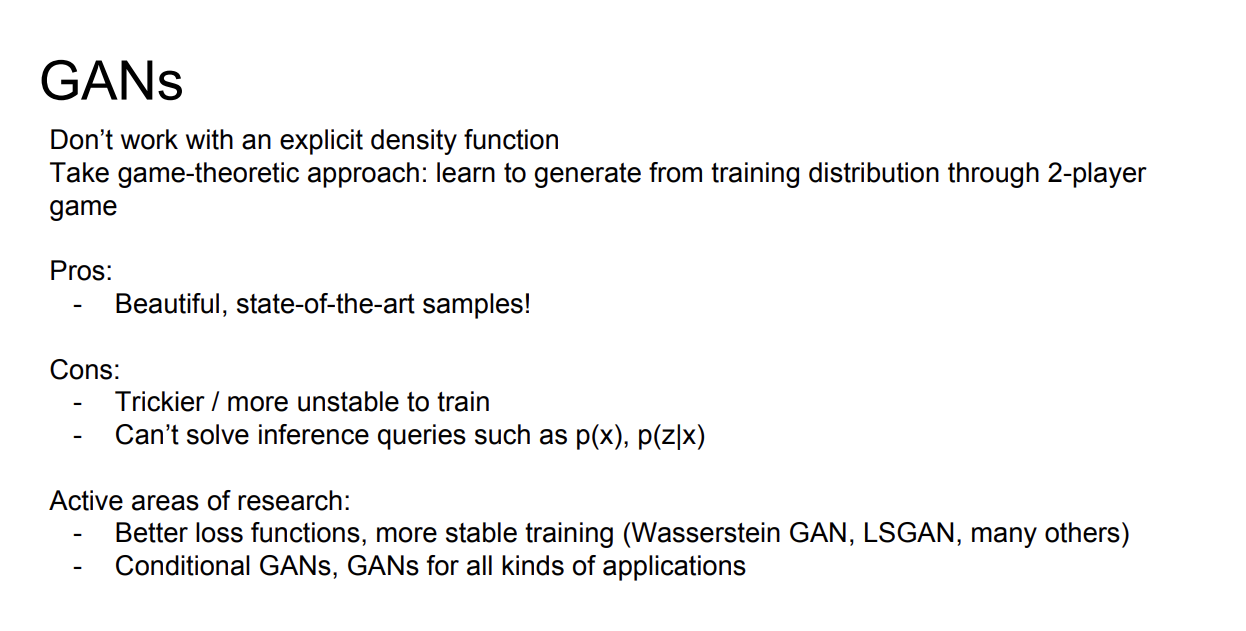

**GAN 요약**  
* GANs은 특정 확률분포를 정의하지 않았다. (Implicit density)  
* two player game을 통해서 학습 데이터의 분포로부터 생성 모델을 학습시킨다.  
* GANs의 장점은 generator가 생성한 데이터의 퀄리티가 SOTA라는 것이다.  
* 단점은 학습시키기 까다롭고 불안정하다는 것과 objective function을 직접적으로 최적화 하는게 아니라는 것이다.  
